In [1]:
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

# from importlib import reload
# import feature_extraction
# reload(feature_extraction)
from biomarkers import (
    EEG,
    EMG,
    BP,
    EOG,
    ECG,
    TREV,
    GSR,
    Resp,
    EGG,
    MARKER_TO_CHANNEL_NAMES,
)
from feature_extraction import (
    Feature,
    EEG_BANDS,
    STAT_FEATURES,
)
from data_utils import (
    extract_labels,
    load_data_from_dir,
    get_all_behaviors_labels,
    extract_features_by_channel,
)
from calculate_correlation import (
    EEG_BANDS_LIST,
    get_all_behaviors_feature_to_pc_by_markers,
    get_all_trials_average_rp_values,
)

In [1]:
"""
    load features from csv
"""
from dataframe.csv_utils import (
    load_data_from_csv,
    get_labels_from_result,
    get_features_from_result,
)

dir_name = "extracted_features_v1"
result = load_data_from_csv(dir_name)
all_label_array, label_list = get_labels_from_result(result)
all_feature_array, feature_names = get_features_from_result(result)
all_feature_array = all_feature_array.drop(["index"], axis=1)
feature_names = all_feature_array.columns
print(all_feature_array.shape, len(feature_names), len(label_list))

(2210, 655) 655 2210


In [4]:
all_dirs = []
subjects = ['2017', '2018',  '2024', '2025', '2026', '2028']
for subj in subjects:
    all_dirs.append(f'../CleandDataV1/{subj}')

dir_to_data = {}
for dir_name in all_dirs:
    all_data = load_data_from_dir(dir_name)
    dir_to_data[dir_name] = all_data   

Loading ../CleandDataV1/2017 data...
Loading ../CleandDataV1/2018 data...
Loading ../CleandDataV1/2024 data...
Loading ../CleandDataV1/2025 data...
Loading ../CleandDataV1/2026 data...
Loading ../CleandDataV1/2028 data...


In [14]:
data = all_data['audio_hvla'].get_all_data()['EEG'][0, :, 1]
data.shape

(12288,)

In [29]:
from features.psd import welch_bandpower
welch_bandpower(data, 512, (20, 30), (2/1) * 512)

/Users/tpan/miniconda3/envs/MM/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 524288 is greater than input length  = 12288, using nperseg = 12288
  warnings.warn('nperseg = {0:d} is greater than input length '


0.8116914881882584

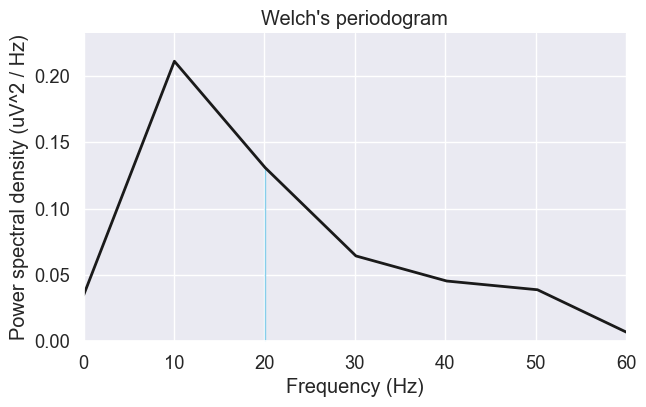

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 512.

# Define delta lower and upper limits
low, high = 20, 30
# Define window length (4 seconds)
win = (2/low) * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum


# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 60])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [27]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 0.000 uV^2


In [ ]:
from dataframe.extraction import (
    extract_features_by_markers,
)

"""
  extract features from physiological signals
"""
# (TODO) GSR, Resp, TREV  BP.__name__, EGG.__name__
markers = [EEG.__name__]
for s in all_dirs:
    starttime = timeit.default_timer()   
    # extract features
    df = extract_features_by_markers(markers, dir_to_data, [s])
#     print(s, df.shape)
#     subject_features = result[result["Subject"] == s]
#     subject_features = subject_features.reset_index()
    
    print("The time difference is :", timeit.default_timer() - starttime) 
    all_features = df #pd.concat([df, subject_features], axis=1)
    # save features to csv
    subject_name = s.replace("../CleandDataV1/", "")
    """ 
      extract labels from behavior data
    """
    all_label_array = extract_labels(dir_to_data, all_dir=[s])
    all_features["Valence"] = all_label_array["valence"]
    all_features["Arousal"] = all_label_array["arousal"]
    all_features["Attention"] = all_label_array["attention"]
    all_features["Subject"] = [subject_name]*130
    all_features.to_csv(
        f"eeg_features1/{subject_name}_features.csv", index=False
    )        

Extracting PSD features for 0...
Extracting PSD features for 1...
Extracting PSD features for 2...
Extracting PSD features for 3...
Extracting PSD features for 4...
Extracting PSD features for 5...
Extracting PSD features for 6...
Extracting PSD features for 7...
Extracting PSD features for 8...
Extracting PSD features for 9...
Extracting PSD features for 10...
Extracting PSD features for 11...
Extracting PSD features for 12...
Extracting PSD features for 13...
Extracting PSD features for 14...
Extracting PSD features for 15...
Extracting PSD features for 16...
Extracting PSD features for 17...
Extracting PSD features for 18...
Extracting PSD features for 19...
Extracting PSD features for 20...
Extracting PSD features for 21...
Extracting PSD features for 22...
Extracting PSD features for 23...
Extracting PSD features for 24...
Extracting PSD features for 25...
Extracting PSD features for 26...
Extracting PSD features for 27...
Extracting PSD features for 28...
Extracting PSD features 

Extracting PSD features for 111...
Extracting PSD features for 112...
Extracting PSD features for 113...
Extracting PSD features for 114...
Extracting PSD features for 115...
Extracting PSD features for 116...
Extracting PSD features for 117...
Extracting PSD features for 118...
Extracting PSD features for 119...
Extracting PSD features for 120...
Extracting PSD features for 121...
Extracting PSD features for 122...
Extracting PSD features for 123...
Extracting PSD features for 124...
Extracting PSD features for 125...
Extracting PSD features for 126...
Extracting PSD features for 127...
extracted EEG stats or PSD features
The time difference is : 685.7632476900003
Extracting PSD features for 0...
Extracting PSD features for 1...
Extracting PSD features for 2...
Extracting PSD features for 3...
Extracting PSD features for 4...
Extracting PSD features for 5...
Extracting PSD features for 6...
Extracting PSD features for 7...
Extracting PSD features for 8...
Extracting PSD features for 9

In [ ]:
"""
    calculate correlation
"""
from dataframe.correlation import (
    get_feature_to_corr_by_behavior,
    get_behavior_to_average_corr,
)

marker = EEG.__name__
behavior_to_rp = {}
for b in ["Valence", "Arousal", "Attention"]:
    behavior_to_rp[b] = get_feature_to_corr_by_behavior(
        result, b, feature_names, marker, "pearsonr"
    )

avg_condition_to_features = get_behavior_to_average_corr(behavior_to_rp)

In [ ]:
from plotting import (
    plot_correlation_table_by_channel,
    plot_k_chaneels_by_r_value,
    plot_eeg_topomap_all_blocks,
    plot_time_series_by_epoch,
)

""" plot the single channel correlation table
"""
# channel = 1
# features = STAT_FEATURES
# channel_names = MARKER_TO_CHANNEL_NAMES[marker]
# for condition, feature_to_pc in avg_condition_to_features.items():
#     label = f"{channel_names[channel]} {condition}"
#     plot_correlation_table_by_channel(
#         label,
#         feature_to_pc,
#         ["pearson r", "pearson p", "spearman r", "spearman p"],
#         features,
#         channel,
#         True,
#     )

""" plot the top channel correlation table given r values
"""
# for condition, feature_to_pc in avg_condition_to_features.items():
#     features = feature_to_pc.keys()
#     plot_k_chaneels_by_r_value(feature_to_pc, channel_names, features, condition, True, 10)
#     plot_k_chaneels_by_r_value(feature_to_pc, channel_names, features, condition, False, 10)

""" 
    plot the topography for eeg
"""
# for condition, feature_to_pc in avg_condition_to_features.items():
#     plot_eeg_topomap_all_blocks(condition, feature_to_pc)
#     features = feature_to_pc.keys()
#     for f in features:
#         plot_eeg_topomap_one_block(condition, f, feature_to_pc, all_block_names)


""" plot the top channel correlation table with different blocks
"""
# all_block_names = list(all_data.keys())
# all_block_names.sort()
# for condition, feature_to_pc in avg_condition_to_features.items():
#     plot_eeg_pearson_correlation_table(condition, feature_to_pc, all_block_names, 1)

""" plot the series for the top k channels
"""
# define number of rows and columns for subplots
# nrow = 3
# ncol = 2
# for condition, feature_to_pc in avg_condition_to_features.items():
#     print(f"{condition}")
#     ser_list = get_eeg_pearson_correlation_series_all_blocks(feature_to_pc, channel_names, k=20)
#     plot_series(nrow, ncol, ser_list)


""" 
    plot the time series given the marker and block
"""
# plot_time_series_by_epoch(all_data['audio_hvla'], 'EEG', 'audio_hvla', 0)

""" 
    plot the scattor for physiological signals
"""
# plot_pd_scatter_by_marker("LEOG", result, ['../2007', '../2002', '../2006'])

In [ ]:
""" 
    discard high correlated features
"""
corr = all_feature_array.corr()
updated = corr[(((corr < 0.9) & (corr > -0.9)) | (corr == 1)).all(axis=1)]
all_feature_array = all_feature_array[list(updated.index.values)]
feature_names = all_feature_array.columns

print(all_feature_array.shape, len(feature_names), len(label_list))

In [ ]:
import seaborn as sns

"""
    plot the correlation heatmap
"""
corr = all_feature_array.corr()
sorted_corr = corr.sort_index().sort_index(axis=1)
truncated_corr = sorted_corr.truncate(
    before="D7_ALPHA", after="VEOG_VAR", axis="rows"
).truncate(before="D7_ALPHA", after="VEOG_VAR", axis="columns")

plt.figure(figsize=(14, 12))
sns.heatmap(truncated_corr, vmin=-1, vmax=1, annot=False, cmap="RdBu_r")

In [ ]:
features = STAT_FEATURES
marker = EOG.__name__

channel_names = dir_to_data["../2002"]["audio_hvla"].get_chanlocs(marker)
channel_num = 0
""" 
    extract features from physiological signals
"""
# features_to_trials = extract_features_by_channel(marker, dir_to_data, features, channel_num, channel_names[channel_num])
# dir_name_to_labels = {}
# for dir_name, all_data in dir_to_data.items():
#     dir_name_to_labels[dir_name] = get_all_behaviors_labels(all_data)

In [ ]:
""" 
    extract correlation from physiological signals
"""
num_channels = 4
num_blocks = 0
dir_name_to_ctf = {}
for dir_name, all_data in dir_to_data.items():
    dir_name_to_ctf[dir_name] = get_all_behaviors_feature_to_pc_by_markers(
        all_data, marker, features, num_channels, num_blocks
    )

avg_condition_to_features = get_all_trials_average_rp_values(
    dir_name_to_ctf, features, "pearson"
)
spearman_corr = get_all_trials_average_rp_values(dir_name_to_ctf, features, "spearman")
for b, feature_to_pc in avg_condition_to_features.items():
    for f, pc in feature_to_pc.items():
        avg_condition_to_features[b][f] = np.hstack((pc, spearman_corr[b][f]))
